1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


40.40404040404041 499.9993208776589 [0.00036035 0.00037646 0.00039323 ... 0.00033508 0.0003196  0.00030478]


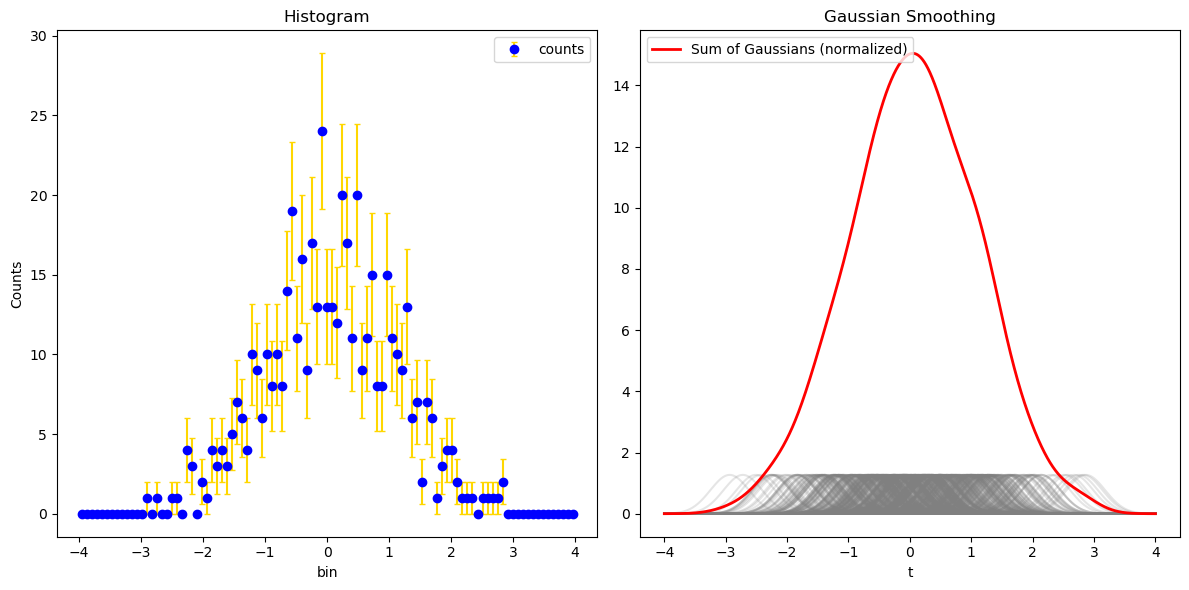

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy.integrate import trapezoid   # <--- IMPORTANTE

# ------------------------
# 1) DATI E ISTOGRAMMA
# ------------------------
data = np.random.normal(loc=0, scale=1, size=500)
histbin = np.linspace(-4, 4, 100)

N, bins = np.histogram(data, bins=histbin)
Nerr = np.sqrt(N)

bin_centers = (bins[:-1] + bins[1:]) / 2


# ------------------------
# 2) FUNZIONE CHE CREA UNA GAUSSIANA PER OGNI DATO
# ------------------------
def gaussian_per_point(x, std=None):
    x = np.asarray(x)
    if std is None:
        std = 1.06 * x.std() * (x.size ** (-1/5))
    gaussians = [norm(loc=xi, scale=std) for xi in x]
    return gaussians, std

gaussians, sigma = gaussian_per_point(data)


# ------------------------
# 3) SOMMA DELLE GAUSSIANE (su una griglia fine)
# ------------------------
t = np.linspace(-4, 4, 2000)
gsum = np.zeros_like(t)

for g in gaussians:
    gsum += g.pdf(t) #mette nell'array tutti i punti della gaussiana, nel ciclo successivo li somma ottenendo alla fine per ogni x la somma dei valori


# ------------------------
# 4) NORMALIZZAZIONE
# ------------------------
# integrale istogramma
hist_integral = trapezoid(N, bin_centers)

# integrale somma gaussiane
gauss_integral = trapezoid(gsum, t)

# normalizziamo
gsum_normalized = gsum * (hist_integral / gauss_integral)

print(hist_integral, gauss_integral, gsum_normalized)

# ------------------------
# 5) GRAFICI
# ------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# --- grafico istogramma ---
ax1.errorbar(bin_centers, N, yerr=Nerr, fmt='o', color='b',
             ecolor='gold', capsize=2, label='counts')
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.set_title('Histogram')
ax1.set_xlabel('bin')
ax1.set_ylabel('Counts')
ax1.legend()

# --- grafico gaussiane e somma normalizzata ---
for g in gaussians:
    ax2.plot(t, g.pdf(t), alpha=0.2, color='gray')

ax2.plot(t, gsum_normalized, color='red', linewidth=2,
         label='Sum of Gaussians (normalized)')

ax2.set_title("Gaussian Smoothing")
ax2.set_xlabel("t")
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


/tmp/ipykernel_29273/2748556206.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([x]*len(y_values), y_values, c=cmap(norm(count)), s=30)


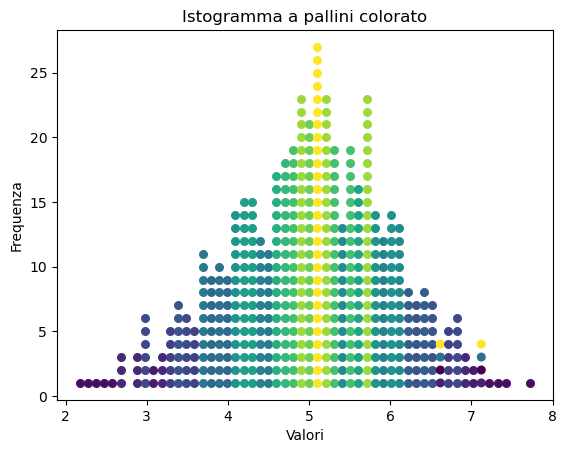

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# dati casuali
data = np.random.normal(loc=5, scale=1, size=500)

# bin dell'istogramma
histbin = np.linspace(0, 10, 100)

# calcola frequenze per bin (senza disegnare ancora)
N, bins = np.histogram(data, bins=histbin)

# centro dei bin per l'asse x
bin_centers = (bins[:-1] + bins[1:]) / 2

# normalizziamo i colori in base alla frequenza
norm = colors.Normalize(vmin=N.min(), vmax=N.max())
cmap = plt.cm.viridis

# prepara figure e assi
fig, ax = plt.subplots()

# disegno i pallini
for x, count in zip(bin_centers, N):
    # crea un punto per ogni unità nella frequenza
    y_values = np.arange(1, count + 1)
    ax.scatter([x]*len(y_values), y_values, c=cmap(norm(count)), s=30)

ax.set_xlabel("Valori")
ax.set_ylabel("Frequenza")
ax.set_title("Istogramma a pallini colorato")

plt.show()


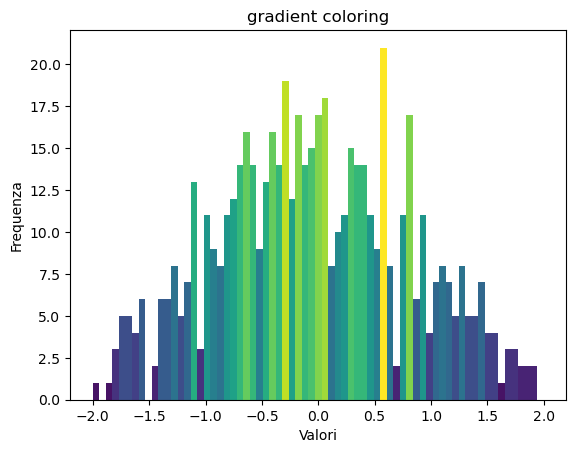

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

eman=0
std=1

data = np.random.normal(loc=mean, scale=std, size=600)
histbin = np.linspace(-2, 2, 70)

#imposto la figura e isolo gli assi per colorarli
fig, ax = plt.subplots()

#conteggi bin: N
#bordi dei bin: bins 
#patches: oggetti grafici delle barre
N, bins, patches = ax.hist(data, bins=histbin, label='bo')

#normalizzo
frac = N/N.max()

#normalizziamo i colori ai nostri conteggi per avere una mappatura completa dei colori, cioe per applicarla ai nostri conteggi
norm = colors.Normalize(frac.min(), frac.max())

#applichiamo i colori, uno ogni barra usando 
for fracs, patch in zip(frac, patches):
    color = plt.cm.viridis(norm(fracs)) #mappa dei colori
    patch.set_facecolor(color)

    
ax.set_xlabel("Valori")
ax.set_ylabel("Frequenza")
ax.set_title("gradient coloring")


plt.show()


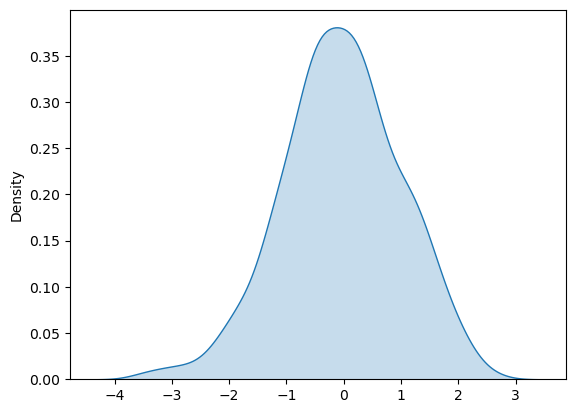

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.normal(loc=0, scale=1, size=500)
sns.kdeplot(data, fill=True)
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

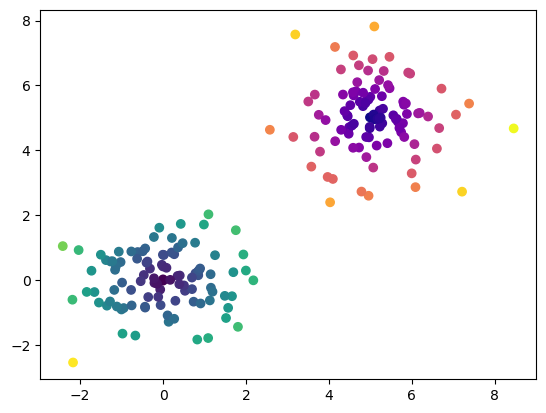

In [24]:
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt


def gaussian2D(n=100, mean1=(0,0), std1=(1,1), mean2=(5,5), std2=(1,1)):
    

    x1 = np.random.normal(loc=mean1[0], scale=std1[0], size=n)
    y1 = np.random.normal(loc=mean1[1], scale=std1[1], size=n)
    class1 = np.column_stack((x1,y1))
    
    x2 = np.random.normal(loc=mean2[0], scale=std2[0], size=n)
    y2 = np.random.normal(loc=mean2[1], scale=std2[1], size=n)
    class2 = np.column_stack((x2,y2))
    
    
    x = np.vstack((class1, class2))
    y = np.array([0]*n+[1]*n)
    return x, y, mean1, mean2

x, y, mean1, mean2 = gaussian2D()

dist1 = np.linalg.norm(x[y==0] - mean1, axis=1)
dist2 = np.linalg.norm(x[y==1] - mean2, axis=1)

norm1 = colors.Normalize(vmin=dist1.min(), vmax=dist1.max())
norm2 = colors.Normalize(vmin=dist2.min(), vmax=dist2.max())

norm = colors.Normalize()
cmap = plt.cm.viridis
cmap2 = plt.cm.plasma


plt.scatter(x[y==0,0], x[y==0,1], c=cmap(norm1(dist1)))
plt.scatter(x[y==1,0], x[y==1,1], c=cmap2(norm2(dist2)))
plt.show()

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

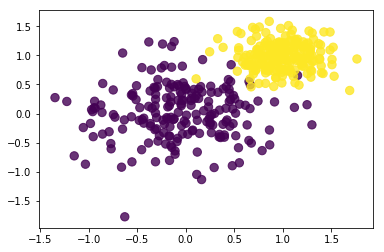

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot